In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

The golden dataset is obtained from here: https://gunw-development-testing.s3.us-west-2.amazonaws.com/jan-2024-final-updates/S1-GUNW-A-R-164-tops-20220212_20220131-222829-00071W_00047N-PP-3d6c-v3_0_0.nc

It is then downloaded and saved as `golden_dataset.nc`.

The other dataset is here: https://gunw-development-testing.s3.us-west-2.amazonaws.com/python-311/S1-GUNW-A-R-164-tops-20220212_20220131-222829-00071W_00047N-PP-3d6c-v3_0_0.nc

These are products generated via:

The sample run here: https://github.com/ACCESS-Cloud-Based-InSAR/DockerizedTopsApp/blob/dev/sample_run.sh

In [2]:
GOLDEN_DATASET = 'golden.nc'
NEW_DATASET_PATH = 'S1-GUNW-A-R-164-tops-20220212_20220131-222829-00071W_00047N-PP-3d6c-v3_0_0.nc'

In [3]:
with rasterio.open(f'netcdf:{GOLDEN_DATASET}') as ds:
    subdatasets = ds.subdatasets
subdatasets = sorted([sd for sd in subdatasets if 'productBoundingBox' not in sd])
subdatasets[:2]

/Users/cmarshak/miniforge3/envs/topsapp_env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


['netcdf:golden.nc:/science/grids/corrections/derived/ionosphere/ionosphere',
 'netcdf:golden.nc:/science/grids/corrections/derived/ionosphereBurstRamps/ionosphereBurstRamps']

In [4]:
local_vars = [sd.split(':')[-1] for sd in subdatasets]
local_vars[:2]

['/science/grids/corrections/derived/ionosphere/ionosphere',
 '/science/grids/corrections/derived/ionosphereBurstRamps/ionosphereBurstRamps']

In [5]:
for golden_path, local_var in zip(subdatasets, local_vars):
    print('#'*10)
    print(local_var)
    print('#'*10)
    with rasterio.open(golden_path) as ds:
        X_golden = ds.read()
        trans_golden = ds.transform
    with rasterio.open(f'netcdf:{NEW_DATASET_PATH}:{local_var}') as ds:
        X_new = ds.read()
        trans_new = ds.transform

    if local_var == '/science/grids/corrections/derived/ionosphere/ionosphere':
        iono_new = X_new
        iono_old = X_golden
        

    X_new_data = X_new.ravel()
    X_golden_data = X_golden.ravel()
    if X_new.dtype in [np.float32, np.float64]:
        X_new_data = X_new[~np.isnan(X_new)]
        X_golden_data = X_golden[~np.isnan(X_golden)]

    print(f'The variable {local_var} has error: ', np.linalg.norm(X_new_data - X_golden_data))
    print(f'The origin of the new dataset is: ', trans_new.c, trans_new.f)
    print(f'The origin of the g(old)en dataset is: ', trans_golden.c, trans_golden.f)
    print('\n')

##########
/science/grids/corrections/derived/ionosphere/ionosphere
##########
The variable /science/grids/corrections/derived/ionosphere/ionosphere has error:  295.74927
The origin of the new dataset is:  -71.180933661 48.669267199000004
The origin of the g(old)en dataset is:  -71.180933661 48.669267199000004


##########
/science/grids/corrections/derived/ionosphereBurstRamps/ionosphereBurstRamps
##########
The variable /science/grids/corrections/derived/ionosphereBurstRamps/ionosphereBurstRamps has error:  240.58662
The origin of the new dataset is:  -71.180933661 48.669267199000004
The origin of the g(old)en dataset is:  -71.180933661 48.669267199000004


##########
/science/grids/data/amplitude
##########
The variable /science/grids/data/amplitude has error:  0.0
The origin of the new dataset is:  -71.180933661 48.669267199000004
The origin of the g(old)en dataset is:  -71.180933661 48.669267199000004


##########
/science/grids/data/coherence
##########
The variable /science/grid

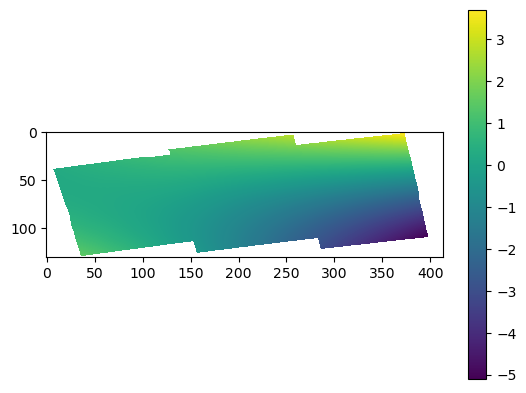

In [6]:
plt.imshow(iono_new[0, ...] - iono_old[0, ...])
plt.colorbar()

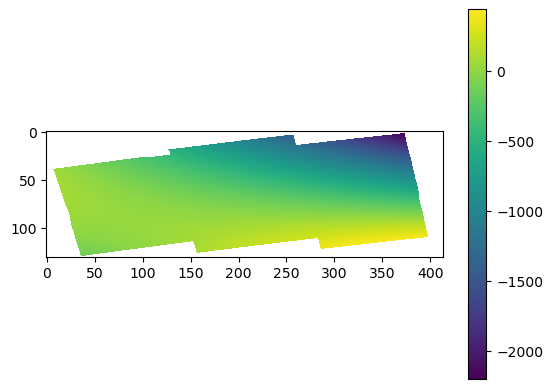

In [7]:
plt.imshow(iono_new[0, ...])
plt.colorbar()

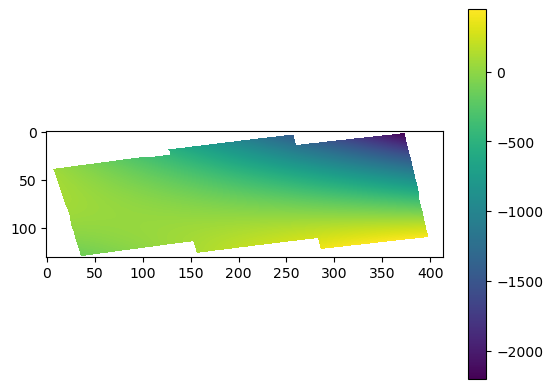

In [8]:
plt.imshow(iono_old[0, ...])
plt.colorbar()